---
title: "Predicting Time Series Data"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-27"
categories: [python, datacamp, machine learning, time series]
image: "predictingTimeSeries.png"

---

# Predicting Time Series Data

 How you choose and construct a model for predicting patterns from data over time requires special consideration. Predictive modeling for time series data is discussed in this chapter, along with best practices on how to gain insights into the data before fitting your model.

This **Predicting Time Series Data** is part of [Datacamp course: Machine Learning for Time Series Data in Python](https://app.datacamp.com/learn/courses/machine-learning-for-time-series-data-in-python)

This is my learning experience of data science through DataCamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Predicting data over time
- Correlation and regression
    - Regression is similar to calculating correlation, with some key differences
        - Regression: A process that results in a formal model of the data
        - Correlation: A statistic that describes the data. Less information than regression model
- Correlation between variables often changes over time
    - Time series often have patterns that change over time
    - Two timeseries that seem correlated at one moment may not remain so over time.
- Scoring regression models
    - Two most common methods:
        - Correlation ($r$)
        - Coefficient of Determination ($R^2$)
            - The value of $R^2$ is bounded on the top by 1, and can be infinitely low
            - Values closer to 1 mean the model does a better jot of predicting outputs \
       $1 - \frac{\text{error}(model)}{\text{variance}(testdata)}$

In [2]:
prices = pd.read_csv('dataset/tsa_prices.csv', index_col='date', parse_dates=True)
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


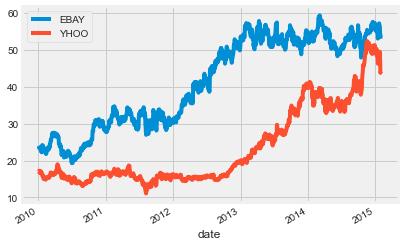

In [3]:
# Plot the raw values over time
prices.plot();

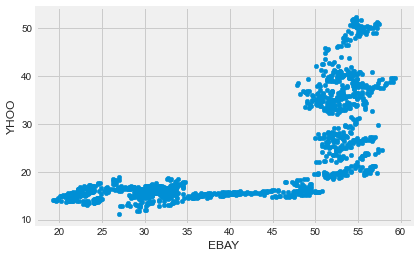

In [4]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO');

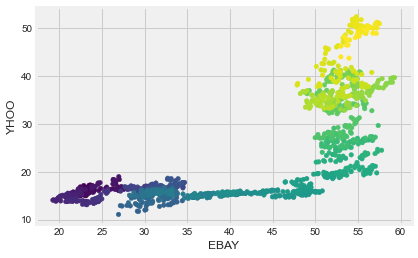

In [5]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, cmap=plt.cm.viridis, colorbar=False);

### Fitting a simple regression model
Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:
```
ebay: "EBAY"
nvidia: "NVDA"
yahoo: "YHOO"
apple: "AAPL"
```
We'll use these columns to define the input/output arrays in our model.

In [6]:
all_prices = pd.read_csv('dataset/all_prices.csv', index_col=0, parse_dates=True)
all_prices.head()

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [7]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


### Visualizing predicted values
When dealing with time series data, it's useful to visualize model predictions on top of the "actual" values that are used to test the model.

In this exercise, after splitting the data (stored in the variables ```X``` and ```y```) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                   shuffle=False, random_state=1)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.3380697256228944



The predictions clearly deviate from the true time series values


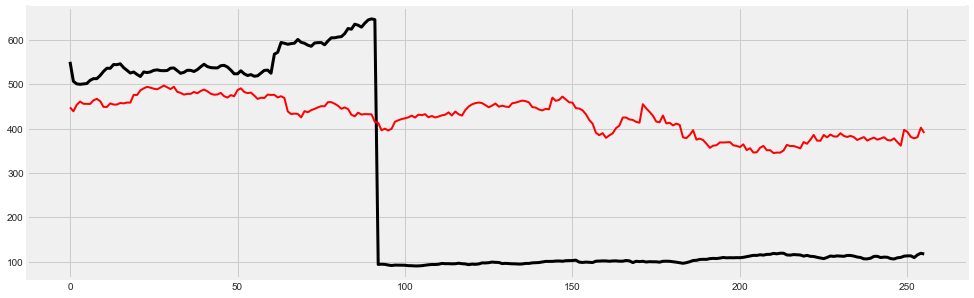

In [10]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);
print("\nThe predictions clearly deviate from the true time series values")

## Advanced time series prediction
- Data is messy
    - Real-world data is often messy
    - The two most common problems are missing data and outliers
    - This often happens because of human error, machine error malfunction, database failure, etc..
    - Visualizing your raw data makes it easier to spot these problems
- Interpolation: using time to fill in missing data
    - A common way to deal with missing data is to interpolate missing values
    - With timeseries data, you can use time to assist in interpolation.
    - In this case, interpolation means using the known values on either side of a gap in the data to make assumptions about what's missing
- Using a rolling window to transform data
    - Another common use of rolling windows is to transform the data
- Finding outliers in your data
    - Outliers are datapoints that are significantly statistically different from the dataset.
    - They can have negative effects on the predictive power of your model, biasing it away from its "true" value
    - One solution is to remove or replace outliers with a more representative value
> Note: Be very careful about doing this - often it is difficult to determine what is a legitimately extreme value vs an abberation.

### Visualizing messy data
Let's take a look at a new dataset - this one is a bit less-clean than what you've seen before.

As always, you'll first start by visualizing the raw data. Take a close look and try to find datapoints that could be problematic for fitting models.

In [11]:
prices = pd.read_csv('dataset/prices_null.csv', index_col=0, parse_dates=True)

EBAY    273
NVDA    502
YHOO    232
dtype: int64

In the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data


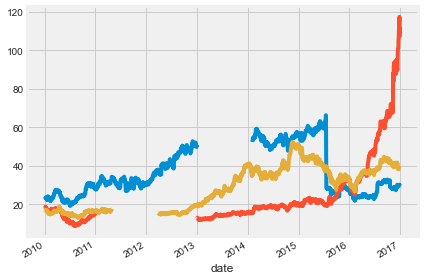

In [13]:
# Visualize the dataset
prices.plot(legend=False);
plt.tight_layout();

# Count the missing values of each time series
missing_values = prices.isnull().sum()
print(missing_values)
print("\nIn the plot, you can see there are clearly missing chunks of time in your data. There also seem to be a few 'jumps' in the data")

### Imputing missing values
When you have missing data points, how can you fill them in?

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (```interpolate_and_plot()```) you'll use to interpolate missing data points and plot them.

In [14]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=0.6, ax=ax, legend=False);

    # Note plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False);

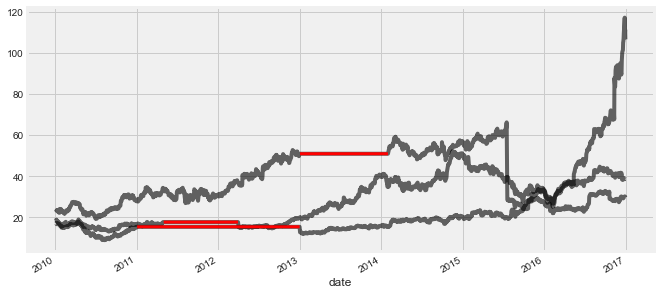

In [15]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

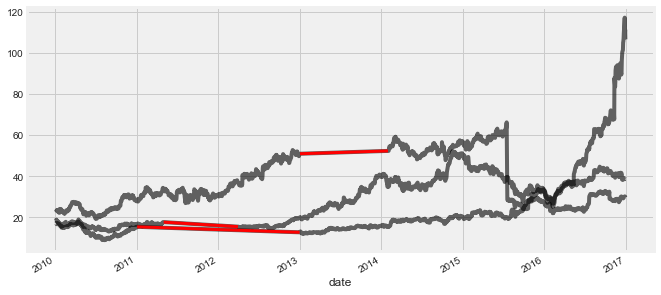

In [16]:
# Interpolate using the latest non-missing value
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

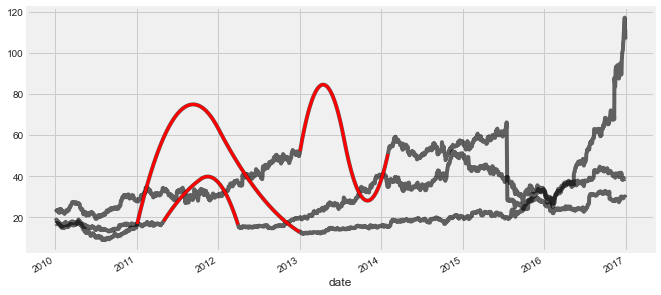

In [17]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

### Transforming raw data
In the last chapter, you calculated the rolling mean. In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

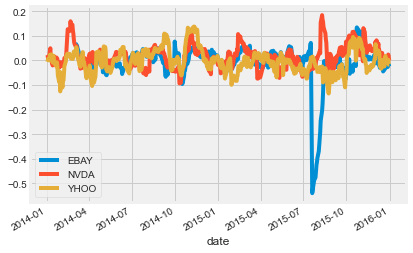

In [18]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot();

### Handling outliers
In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers. First you will write a function that replaces outlier data points with the median value from the entire time series.

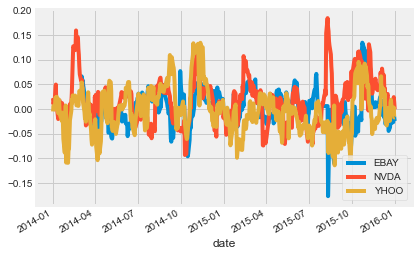

In [19]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))

    # Calculate a mask for the difference that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)

    # Replace these values with the median across the data
    series[this_mask] = np.nanmedian(series)
    return series

# Apply your preprocessing functino to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot();

## Creating features over time
- Calculating "date-based" features
    - Thus far we've focused on calculating "statistical" features - these are features that correspond statistical properties of the data, like "mean" , "standard deviation", etc
    - However, don't forget the timeseries data oftenhas more "human" features associated with it, like days of the week, holidays, etc.
    - These features are often useful when dealing with timeseries data that spans multiple years (such as stock value over time)

### Engineering multiple rolling features at once
Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.

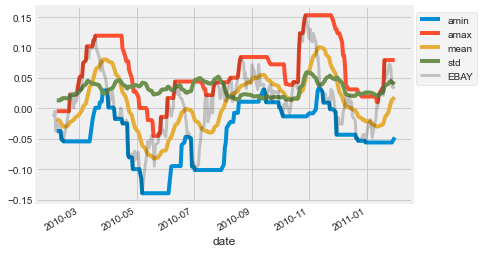

In [20]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')

# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

# Plot the results
ax = features.loc[:"2011-01"].plot();
prices_perc['EBAY'].loc[:"2011-01"].plot(ax=ax, color='k', alpha=0.2, lw=3);
ax.legend(loc=(1.01, 0.6));

### Percentiles and partial functions
In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same ```percentile()``` function in numpy.

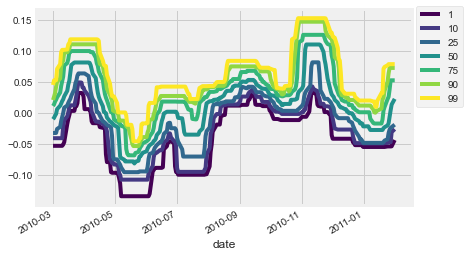

In [21]:
from functools import partial
percentiles = [1, 10, 25, 50, 75, 90, 99]

# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc['EBAY'].rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis);
ax.legend(percentiles, loc=(1.01, 0.5));

### Using "date" information
It's easy to think of timestamps as pure numbers, but don't forget they generally correspond to things that happen in the real world. That means there's often extra information encoded in the data such as "is it a weekday?" or "is it a holiday?". This information is often useful in predicting timeseries data.

In [ ]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.dayofweek
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc)